<a href="https://colab.research.google.com/github/eleven111101/Linear_regression-01/blob/main/LiR_Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
print("hello world")

hello world


# **Linear regression // Salary prediction Model**

In [134]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [135]:
df=pd.read_csv("/content/accountant_salary.csv")

In [136]:
df.head()

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
0,1,1,0,4,3,9.6,4,89661
1,1,1,1,9,4,3.6,3,105336
2,1,0,0,13,2,6.9,2,91402
3,1,1,1,2,3,8.9,1,96137
4,1,2,1,13,5,7.5,4,113364



**Data in CSV Format**


- **Degree**: Has a degree (1 indicates having a degree).
- **Master's**: Pursuing or has completed a master's degree (0 indicates no master's degree, 1 indicates pursuing or completed).
- **Professional Membership**: Active member of relevant professional organizations (1 indicates active member, 0 indicates not a member).
- **Years of Experience**: Accumulated substantial experience over the years.
- **Audit Experience**: Proficient in audit procedures and methodologies.
- **IT Skill Rate**: Possesses a high level of proficiency in IT skills.
- **Size of the Company Worked**: Worked in a company categorized as follows:
  - 1: Small-sized company.
  - 2: Medium-sized company.
  - 3: Large-sized company.
  - 4: Multinational Corporation (MNC).
- **Salary per Year**: Earns a competitive salary based on qualifications and experience.

In [137]:
df.head(10)

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
0,1,1,0,4,3,9.6,4,89661
1,1,1,1,9,4,3.6,3,105336
2,1,0,0,13,2,6.9,2,91402
3,1,1,1,2,3,8.9,1,96137
4,1,2,1,13,5,7.5,4,113364
5,1,2,0,3,0,9.0,3,79799
6,1,1,1,8,3,9.7,1,106253
7,1,1,0,6,1,4.7,4,80808
8,1,1,0,11,2,2.2,2,90258
9,1,0,0,9,4,6.6,2,90976


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   degree                      1013 non-null   int64  
 1   masters                     1013 non-null   int64  
 2   professional_membership     1013 non-null   int64  
 3   years_experience            1013 non-null   int64  
 4   audit_experience            1013 non-null   int64  
 5   IT_skill_rate               1013 non-null   float64
 6   Size_of_the_company_worked  1013 non-null   int64  
 7   salary_per_year             1013 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 63.4 KB


In [139]:
df.describe()

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.991115,0.992103,0.514314,8.599210,2.508391,5.532280,2.451135,94359.632774
std,0.093884,0.816055,0.500042,3.950944,1.730675,2.604028,1.128516,8526.685211
min,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,69373.000000
25%,1.000000,0.000000,0.000000,5.000000,1.000000,3.300000,1.000000,88544.000000
50%,1.000000,1.000000,1.000000,9.000000,3.000000,5.500000,2.000000,93870.000000
75%,1.000000,2.000000,1.000000,12.000000,4.000000,7.900000,3.000000,100299.000000
max,1.000000,2.000000,1.000000,15.000000,5.000000,9.900000,4.000000,119708.000000


In [140]:
df["salary_per_year"]

0        89661
1       105336
2        91402
3        96137
4       113364
         ...  
1008     96438
1009     85523
1010    100476
1011    107083
1012     82310
Name: salary_per_year, Length: 1013, dtype: int64

In [141]:
max(df["salary_per_year"])

119708

In [142]:
min(df["salary_per_year"])

69373

In [143]:
sum(df["salary_per_year"])

95586308

In [144]:
 df["salary_per_year"] > 115000

0       False
1       False
2       False
3       False
4       False
        ...  
1008    False
1009    False
1010    False
1011    False
1012    False
Name: salary_per_year, Length: 1013, dtype: bool

In [145]:
df[df["salary_per_year"] > 115000]

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
97,1,2,1,14,5,5.6,3,115944
218,1,2,1,15,4,4.4,2,115506
447,1,2,1,14,4,7.3,3,116815
636,1,2,1,15,4,7.5,2,119708
749,1,0,1,15,5,8.4,1,116087
878,1,1,1,14,5,8.3,2,118072


In [146]:
df.head()

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
0,1,1,0,4,3,9.6,4,89661
1,1,1,1,9,4,3.6,3,105336
2,1,0,0,13,2,6.9,2,91402
3,1,1,1,2,3,8.9,1,96137
4,1,2,1,13,5,7.5,4,113364


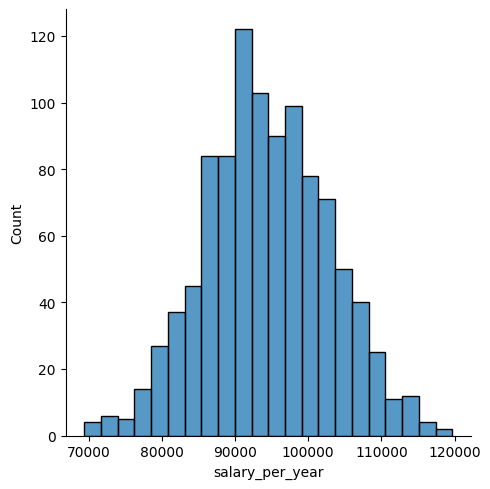

In [147]:
sns.displot(df["salary_per_year"])

In [148]:
df.corr()

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
degree,1.000000,-0.000917,-0.049910,0.019694,0.009582,0.037955,0.056521,0.059452
masters,-0.000917,1.000000,-0.060261,0.041311,-0.039833,-0.023037,0.031770,0.188059
professional_membership,-0.049910,-0.060261,1.000000,-0.022102,0.013848,-0.022400,-0.061360,0.550464
years_experience,0.019694,0.041311,-0.022102,1.000000,-0.001964,0.004937,-0.046505,0.539229
audit_experience,0.009582,-0.039833,0.013848,-0.001964,1.000000,-0.052321,-0.024960,0.376497
IT_skill_rate,0.037955,-0.023037,-0.022400,0.004937,-0.052321,1.000000,-0.007045,0.185843
Size_of_the_company_worked,0.056521,0.031770,-0.061360,-0.046505,-0.024960,-0.007045,1.000000,0.029152
salary_per_year,0.059452,0.188059,0.550464,0.539229,0.376497,0.185843,0.029152,1.000000


<Axes: >

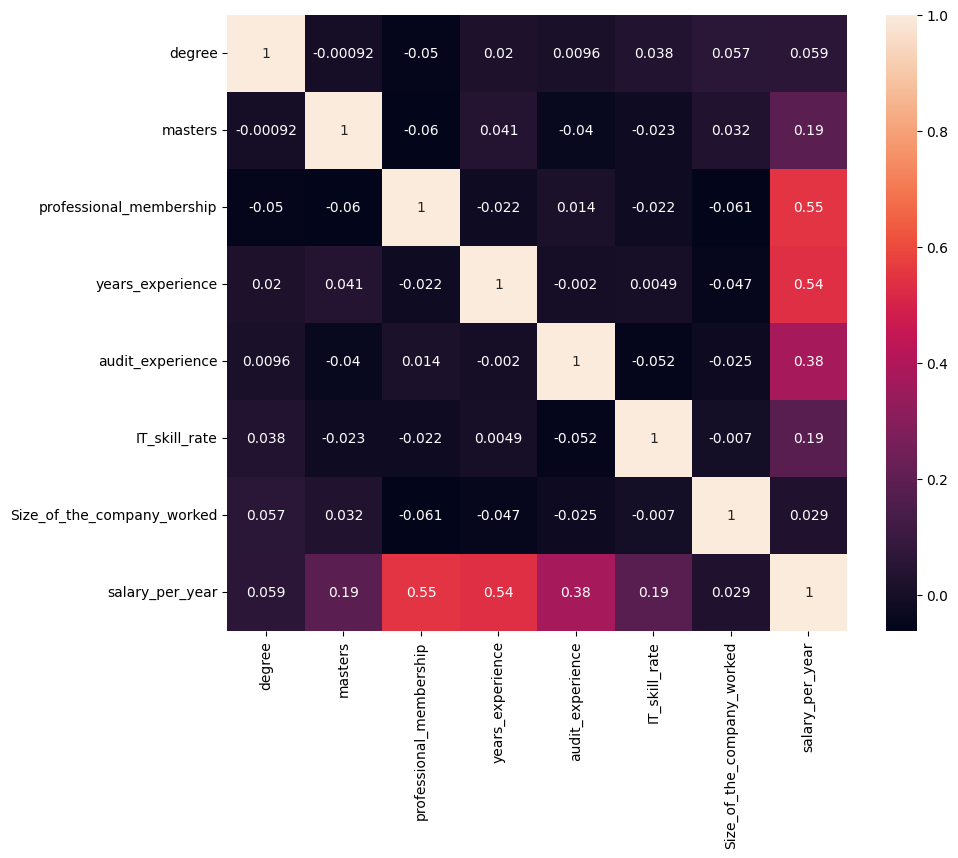

In [149]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [150]:
df.columns

Index(['degree', 'masters', 'professional_membership', 'years_experience',
       'audit_experience', 'IT_skill_rate', 'Size_of_the_company_worked',
       'salary_per_year'],
      dtype='object')

In [151]:
X = df.drop("salary_per_year",axis=1)

In [152]:
X.head()

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked
0,1,1,0,4,3,9.6,4
1,1,1,1,9,4,3.6,3
2,1,0,0,13,2,6.9,2
3,1,1,1,2,3,8.9,1
4,1,2,1,13,5,7.5,4


In [153]:
Y = df["salary_per_year"]

In [154]:
Y.head(10)

0     89661
1    105336
2     91402
3     96137
4    113364
5     79799
6    106253
7     80808
8     90258
9     90976
Name: salary_per_year, dtype: int64

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [157]:
len(df)

1013

In [158]:
len(X_train) , len(Y_train)

(678, 678)

In [159]:
len(X_test) , len(Y_test)

(335, 335)

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
model = LinearRegression()

In [162]:
model.fit(X_train , Y_train)

LinearRegression()

In [163]:
prediction = model.predict(X_test)

**Evaluate Model**

In [164]:
prediction

array([ 97624.82166637,  90888.64024244, 100550.96548128,  95001.54802934,
        95716.26965652,  88043.67294003,  98048.34689682,  99388.30213952,
        99131.01562773,  95648.0930036 , 103030.63978834, 104875.81512026,
        98224.0140496 ,  94127.00582185,  88388.3772683 , 105708.3719143 ,
        95641.828923  ,  97218.18198915,  97829.40578788,  95465.52429452,
        96429.30048465,  96063.24447103,  82585.92084436, 107159.21579014,
        99898.924843  ,  90922.78686994,  97962.93212172,  80972.35686033,
        92083.90250521,  99136.28966368,  97563.04577348,  83927.14698791,
        91154.77221564,  95972.52427384,  98326.94476735,  89273.50146118,
        94051.28059618,  90247.7124242 ,  99192.43490111,  86874.81696687,
        85854.40932666,  71293.81898064, 101130.25644863,  93414.95693724,
        87464.91307088,  98108.42659235, 108464.33715414,  98516.40584742,
        91749.9678769 ,  85967.8194393 ,  79230.68340742,  88393.58802556,
        80679.48391526,  

In [165]:
prediction[0]

97624.82166636703

In [166]:
np_Y_test = np.array(Y_test)

In [167]:
np_Y_test[0]

93571

In [168]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [169]:
print("Mean_absolute_error - ",mean_absolute_error(Y_test , prediction))

Mean_absolute_error -  2754.285125447212


In [170]:
print("Mean_squared_error - ",mean_squared_error(Y_test , prediction))

Mean_squared_error -  10641378.164973484


In [171]:
print("Root_Mean_absolute_error - ",np.sqrt(mean_squared_error(Y_test , prediction)))

Root_Mean_absolute_error -  3262.1125310101556


In [172]:
index_position = 100
np_Y_test = np.array(Y_test)
actual = np_Y_test[index_position]/1
pred = round(prediction[index_position],2)
diff = round(actual-pred,2)
perc = round(diff/actual*100,2)
print('Actual    : ' + str(actual))
print('Prediction: ' + str(pred))
print('Error     : ' + str(diff))
print('Error %   : ' + str(perc)+'%')

Actual    : 91235.0
Prediction: 88477.3
Error     : 2757.7
Error %   : 3.02%
